<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_4_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [ ]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(cancer_tissues.columns)
print(cancer_tissues.columns.size)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
33


Creo una matriz donde los cánceres malignos se representan con 0 y los cánceres benignos con 1.

In [ ]:
cancer_type=np.zeros(cancer_tissues.diagnosis.size)
for i in np.arange(0,cancer_tissues.diagnosis.size):
  if cancer_tissues.diagnosis[i]=='M':
    cancer_type[i]=0
  if cancer_tissues.diagnosis[i]=='B':
    cancer_type[i]=1

print(cancer_type)
print(cancer_type.size)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

In [ ]:
# Clasifico utilizando Support Vector Machine
classifier = svm.SVC(gamma=0.001)
# Entreno el clasificador
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Ahora testeo 
y_predicted = classifier.predict(x_test)

Confusion matrix:
[[40  2]
 [ 3 69]]

Sensibilidad: 0.9302325581395349
Presicion: 0.9523809523809523
Exactitud: 0.956140350877193
Fall_out: 0.028169014084507043


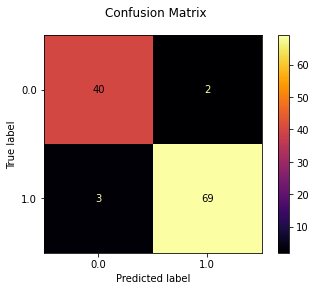

In [ ]:
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

El programa ubica los datos que corresponden a cánceres malignos en la fila superior de la matriz de confusión. Los cánceres malignos serían considerados como positivos.

In [ ]:
El clasificador con las condiciones dadas es muy bueno.

**Varío el gamma para ver como cambian las predicciones**

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


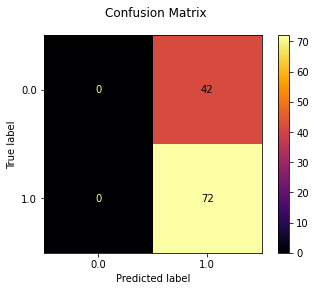

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.01)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


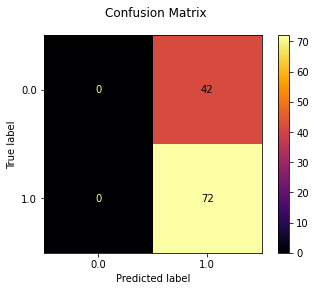

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 0 42]
 [ 0 72]]

Sensibilidad: nan
Presicion: 0.0
Exactitud: 0.631578947368421
Fall_out: 0.3684210526315789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


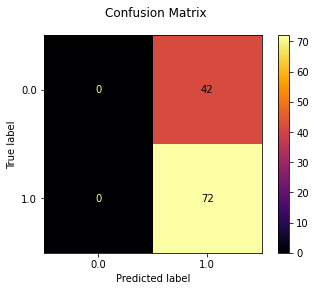

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[36  6]
 [ 1 71]]

Sensibilidad: 0.972972972972973
Presicion: 0.8571428571428571
Exactitud: 0.9385964912280702
Fall_out: 0.07792207792207792


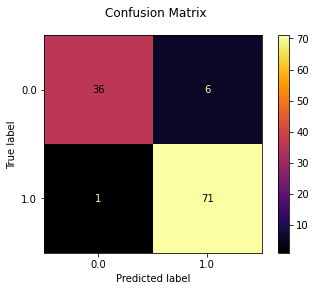

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[32 10]
 [ 2 70]]

Sensibilidad: 0.9411764705882353
Presicion: 0.7619047619047619
Exactitud: 0.8947368421052632
Fall_out: 0.125


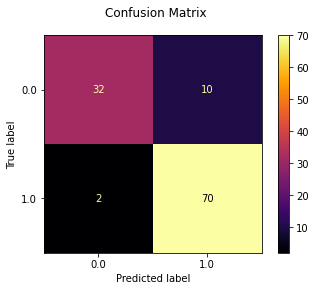

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.00001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[31 11]
 [ 0 72]]

Sensibilidad: 1.0
Presicion: 0.7380952380952381
Exactitud: 0.9035087719298246
Fall_out: 0.13253012048192772


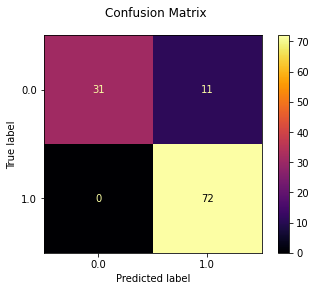

In [ ]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.000001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Valores óptimos para gamma parecen ser entre 0.001 y 0.0001. Es cuando se obtienen mejores resultados.

Con valores mayores a 0.001 me clasifica todos los cánceres como benignos, es un clasificador espantoso.

**Mantengo gamma y varío el tamaño del dataset de entrenamiento y testeo**

Confusion matrix:
[[ 60   3]
 [  6 102]]

Sensibilidad: 0.9090909090909091
Presicion: 0.9523809523809523
Exactitud: 0.9473684210526315
Fall_out: 0.02857142857142857


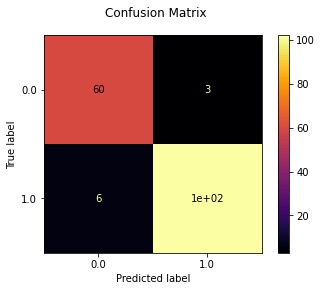

In [ ]:
#Tomo un 70% del dataset como entrenamiento, y un 30% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.3, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 74   6]
 [ 13 135]]

Sensibilidad: 0.8505747126436781
Presicion: 0.925
Exactitud: 0.9166666666666666
Fall_out: 0.0425531914893617


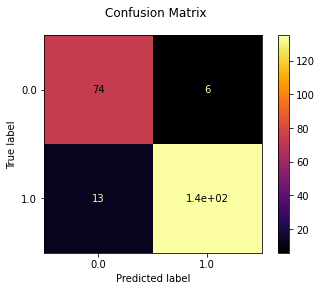

In [ ]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Al caso de 60% del dtaset como entrenamiento y 40% como testeo le varío el gamma a 0.0001

Confusion matrix:
[[ 73   7]
 [  7 141]]

Sensibilidad: 0.9125
Presicion: 0.9125
Exactitud: 0.9385964912280702
Fall_out: 0.0472972972972973


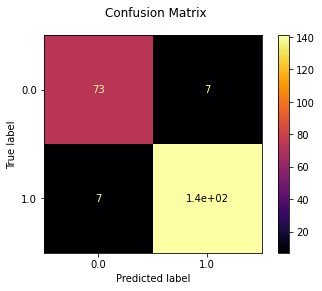

In [ ]:
#Tomo un 60% del dataset como entrenamiento, y un 40% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 74   6]
 [ 11 137]]

Sensibilidad: 0.8705882352941177
Presicion: 0.925
Exactitud: 0.9254385964912281
Fall_out: 0.04195804195804196


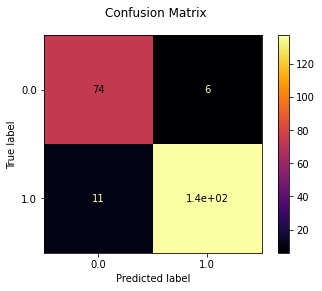

In [ ]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.4, random_state=1)

classifier = svm.SVC(gamma=0.0005)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Confusion matrix:
[[ 91  12]
 [ 21 161]]

Sensibilidad: 0.8125
Presicion: 0.883495145631068
Exactitud: 0.8842105263157894
Fall_out: 0.06936416184971098


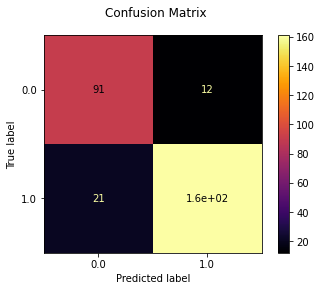

In [ ]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.5, random_state=1)

classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

A este último caso, le varío el gamma, para ver si mejora un poco.

Confusion matrix:
[[ 88  15]
 [  6 176]]

Sensibilidad: 0.9361702127659575
Presicion: 0.8543689320388349
Exactitud: 0.9263157894736842
Fall_out: 0.07853403141361257


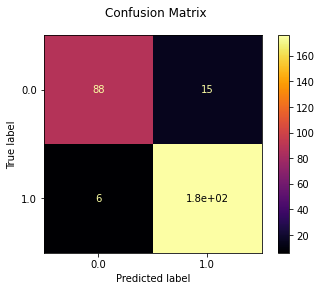

In [ ]:
#Tomo un 50% del dataset como entrenamiento, y un 50% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.5, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Para las últimas pruebas, donde se cambió gamma de 0.001 a 0.0001 para los casos de clasificación con un dataset de entrenamiento del 60% del dataset total sensibilidad y la exactitud se ven mejorada, y la precision dismuniye un poco. Pareciera que el parámetro mas óptimo de gamma sería 0.0001.

Y probado para el caso de dataset de entrenamiento del 60%, un valor intermedi oentre 0.001 y 0.0001 parece obtener buenos resultados de presición, exactitud y sensibilidad.

Confusion matrix:
[[36  6]
 [ 1 71]]

Sensibilidad: 0.972972972972973
Presicion: 0.8571428571428571
Exactitud: 0.9385964912280702
Fall_out: 0.07792207792207792


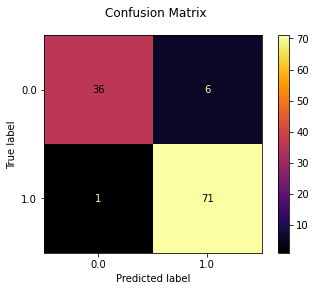

In [61]:
#Tomo un 80% del dataset como entrenamiento, y un 20% para testear
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer_tissues.iloc[:,2:31], cancer_type, test_size=0.2, random_state=1)

classifier = svm.SVC(gamma=0.0001)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])
print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

Para el caso de un dataset de entrenamiento que es el 80% del dataset completo, la variación de sigma parece no afectar considerablemente con las predicciones.